In [1]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import Image

In [2]:
STATISTIC_FOLDER = 'Statistic'
data = {}

In [3]:
# functions for parsing data from strings
# returns extracted data
def takeIntValue(line):
    removeWhiteSpace = line.strip()
    removeNewLine = removeWhiteSpace.split("\n")[0]
    removeName = removeNewLine.split(":")[1]
    return float(removeName)

def takeStringValue(line):
    return line.split("\n")[0].split(":")[1].strip()

In [4]:
# function for reading specific statistics file and extracting data
# returns array of extracted data
def readStatisticFile(filename):
    with open(STATISTIC_FOLDER + '/' + filename) as f:
        MODEL_NAME = ""
        lossLine = ""
        accLine = ""
        
        for line in f:
            print(line)
            if line.startswith("MODEL NAME"):
                MODEL_NAME = takeStringValue(line)
            if line.startswith("TEST LOSS:"):
                lossLine = takeIntValue(line)
            if line.startswith("TEST ACCURACY:"):
                accLine = takeIntValue(line)
    return [MODEL_NAME, lossLine, accLine]

In [5]:
# function for visualization of accurasy and loss 
# crating two plots and saving them in png format
def vizualize(model_names, plot_name):
    names = []
    acc = []
    loss = []
    for model in model_names:
        model_data = data[model]
        print(model_data)
        names = np.append(names, [model])
        acc = np.append(acc, [model_data[1]])
        loss = np.append(loss, [model_data[0]])

    fig_loss = plt.figure()
    plt.plot(names, loss, label=plot_name + '_LOSS')
    plt.legend()
    plt.show()
    
    fig_acc = plt.figure()
    plt.plot(names, acc, label=plot_name + '_ACC')
    plt.legend()
    plt.show()
    
    if not os.path.exists('PlotImages/'):
        os.makedirs('PlotImages/')
    
    fig_loss.savefig('PlotImages/' + plot_name + '_LOSS.png')
    fig_acc.savefig('PlotImages/' + plot_name + '_ACC.png')



In [12]:
# reading statistic folder and extracting data from them
print("===========================================================")
for filename in os.listdir(STATISTIC_FOLDER):
    if filename != ".DS_Store":
        current_file_data = readStatisticFile(filename)
        data[current_file_data[0]] = [current_file_data[1], current_file_data[2]]
        print("===========================================================")

MODEL NAME: test_300

TEST LOSS:0.043634 

TEST ACCURACY:0.988009
MODEL NAME: test_50_E10

TEST LOSS:0.039140 

TEST ACCURACY:0.989265
MODEL NAME: test_100

TEST LOSS:0.045373 

TEST ACCURACY:0.987473
MODEL NAME: test_50_64B

TEST LOSS:0.065624 

TEST ACCURACY:0.982393
MODEL NAME:test_50_ttv03

TEST LOSS:2.2641558638008736

TEST ACCURACY:0.799294310032417



MODEL NAME: test_200

TEST LOSS:0.045263 

TEST ACCURACY:0.987599
MODEL NAME: test_50_E3

TEST LOSS:0.051771 

TEST ACCURACY:0.985708
MODEL NAME: test_50

TEST LOSS:0.058885 

TEST ACCURACY:0.983702
MODEL NAME: test_50_16B

TEST LOSS:0.055306 

TEST ACCURACY:0.984977
MODEL NAME: test_50_E5

TEST LOSS:0.044612 

TEST ACCURACY:0.987711


[2.2641558638008736, 0.799294310032417]
[0.058885, 0.983702]


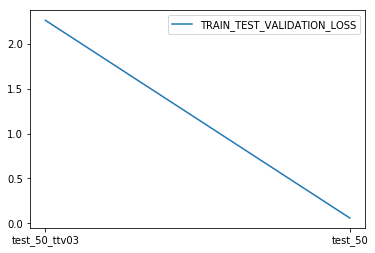

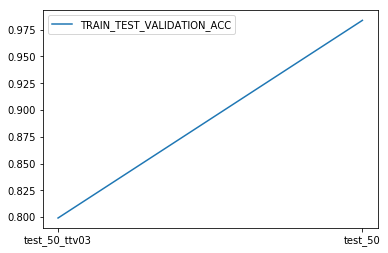

In [7]:
TEST_TRAIN_SPLIT_PLOT = ['test_50_ttv03', 'test_50']
vizualize(TEST_TRAIN_SPLIT_PLOT, 'TRAIN_TEST_VALIDATION')

[0.058885, 0.983702]
[0.045373, 0.987473]
[0.045263, 0.987599]
[0.043634, 0.988009]


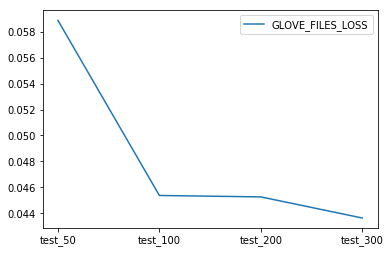

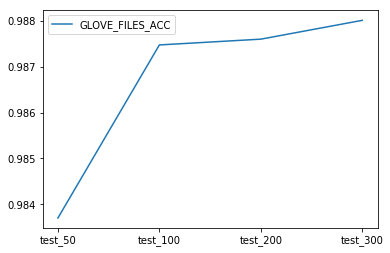

In [8]:
GLOVE_PLOT = ['test_50', 'test_100', 'test_200', 'test_300']
vizualize(GLOVE_PLOT, 'GLOVE_FILES')

[0.058885, 0.983702]
[0.051771, 0.985708]
[0.044612, 0.987711]
[0.03914, 0.989265]


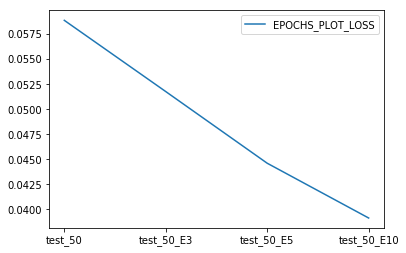

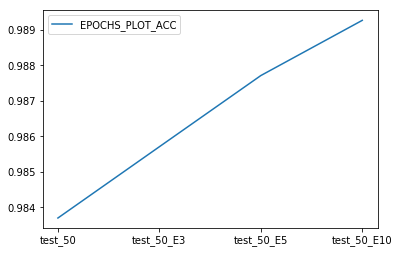

In [9]:
EPOCHS_PLOT = ['test_50', 'test_50_E3', 'test_50_E5', 'test_50_E10']
vizualize(EPOCHS_PLOT, 'EPOCHS_PLOT')

[0.058885, 0.983702]
[0.055306, 0.984977]
[0.065624, 0.982393]


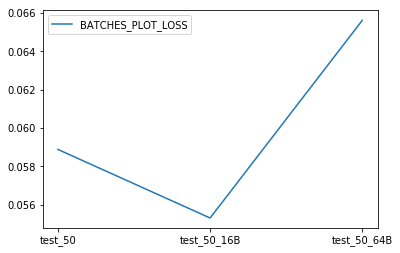

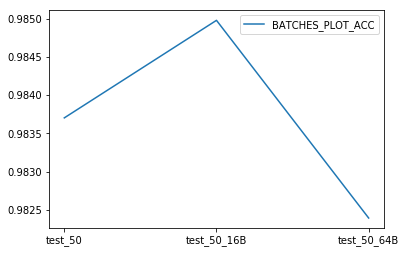

In [11]:
BATCHES_PLOT = ['test_50', 'test_50_16B', 'test_50_64B']
vizualize(BATCHES_PLOT, 'BATCHES_PLOT')